In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Datasets/titanic3.xls')

In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
df.dtypes

,0
pclass,int64
survived,int64
name,object
sex,object
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,object


In [ ]:
df.shape

(1309, 14)

In [ ]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
df2 = df.drop(['name', 'boat','body','home.dest'], axis=1)

In [ ]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
df2.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked'],
      dtype='object')

In [ ]:
df2.rename(columns={'pclass': 'TicketClass', 'sibsp': 'withspouse','parch':'withchildren'}, inplace=True)

In [ ]:
df2.columns

Index(['TicketClass', 'survived', 'sex', 'age', 'withspouse', 'withchildren',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TicketClass   1309 non-null   int64  
 1   survived      1309 non-null   int64  
 2   sex           1309 non-null   object 
 3   age           1046 non-null   float64
 4   withspouse    1309 non-null   int64  
 5   withchildren  1309 non-null   int64  
 6   ticket        1309 non-null   object 
 7   fare          1308 non-null   float64
 8   cabin         295 non-null    object 
 9   embarked      1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [ ]:
df2 = df2.drop('cabin', axis=1)


In [ ]:
df2.columns

Index(['TicketClass', 'survived', 'sex', 'age', 'withspouse', 'withchildren',
       'ticket', 'fare', 'embarked'],
      dtype='object')

In [ ]:
missing_values = df2.isnull().sum()
print(missing_values)

TicketClass       0
survived          0
sex               0
age             263
withspouse        0
withchildren      0
ticket            0
fare              1
embarked          2
dtype: int64


In [ ]:
df2 = df2.drop(['ticket','fare'], axis=1)

In [ ]:
df2.columns

Index(['TicketClass', 'survived', 'sex', 'age', 'withspouse', 'withchildren',
       'embarked'],
      dtype='object')

In [ ]:
df2.head()

,TicketClass,survived,sex,age,withspouse,withchildren,embarked
0,1,1,female,29.0000,0,0,S
1,1,1,male,0.9167,1,2,S
2,1,0,female,2.0000,1,2,S
3,1,0,male,30.0000,1,2,S
4,1,0,female,25.0000,1,2,S


In [ ]:
df2['withchildren'] = df2['withchildren'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df2.head()

,TicketClass,survived,sex,age,withspouse,withchildren,embarked
0,1,1,female,29.0000,0,0,S
1,1,1,male,0.9167,1,1,S
2,1,0,female,2.0000,1,1,S
3,1,0,male,30.0000,1,1,S
4,1,0,female,25.0000,1,1,S


/tmp/ipykernel_19833/1453014238.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='survived', palette='Set1')


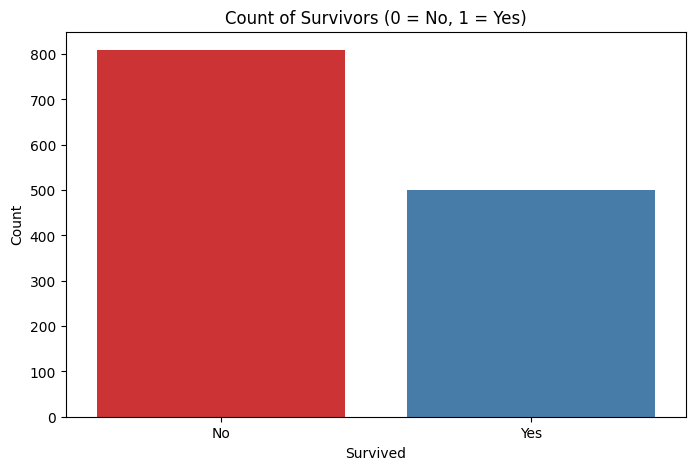

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df2, x='survived', palette='Set1')
plt.title('Count of Survivors (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


/tmp/ipykernel_19833/1454875972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x='sex', y='survived', palette='Set1')


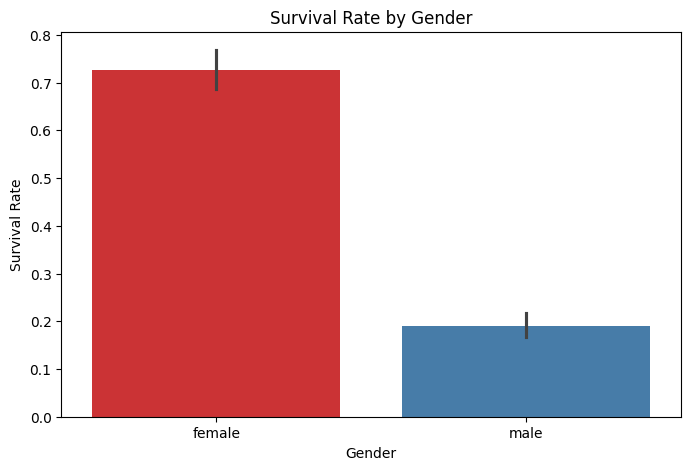

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df2, x='sex', y='survived', palette='Set1')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

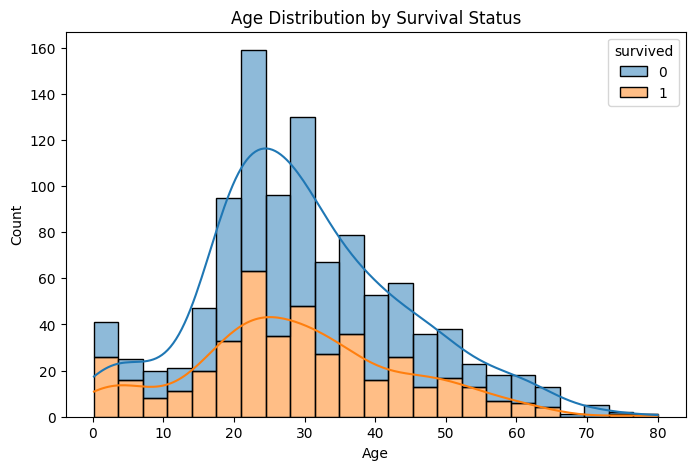

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df2, x='age', hue='survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_19833/1672661470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x='TicketClass', y='survived', palette='Set1')


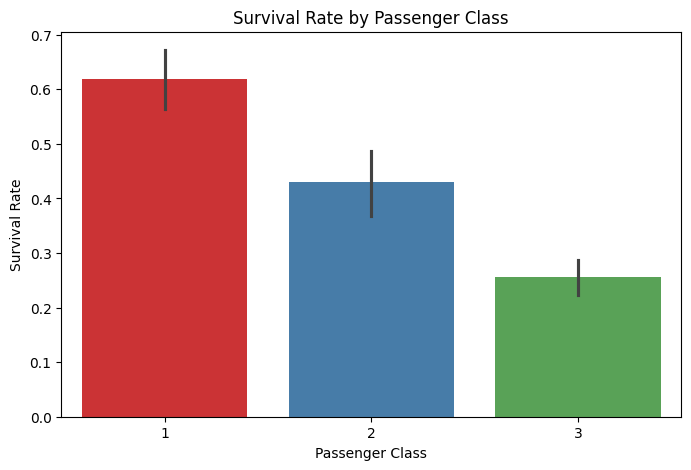

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df2, x='TicketClass', y='survived', palette='Set1')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


In [ ]:
summary_stats = df2.describe(include='all')
print(summary_stats)

        TicketClass     survived   sex          age   withspouse  \
count   1309.000000  1309.000000  1309  1046.000000  1309.000000   
unique          NaN          NaN     2          NaN          NaN   
top             NaN          NaN  male          NaN          NaN   
freq            NaN          NaN   843          NaN          NaN   
mean       2.294882     0.381971   NaN    29.881135     0.498854   
std        0.837836     0.486055   NaN    14.413500     1.041658   
min        1.000000     0.000000   NaN     0.166700     0.000000   
25%        2.000000     0.000000   NaN    21.000000     0.000000   
50%        3.000000     0.000000   NaN    28.000000     0.000000   
75%        3.000000     1.000000   NaN    39.000000     1.000000   
max        3.000000     1.000000   NaN    80.000000     8.000000   

        withchildren embarked  
count    1309.000000     1307  
unique           NaN        3  
top              NaN        S  
freq             NaN      914  
mean        0.234530   

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode 'sex'
df3 = pd.get_dummies(df2, columns=['sex'], drop_first=True)

In [ ]:
df3.head()

,TicketClass,survived,age,withspouse,withchildren,embarked,sex_male
0,1,1,29.0000,0,0,S,0
1,1,1,0.9167,1,1,S,1
2,1,0,2.0000,1,1,S,0
3,1,0,30.0000,1,1,S,1
4,1,0,25.0000,1,1,S,0


In [ ]:
! pip install autoviml



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (1309, 7)
    Training Set Memory Usage = 0.06 MB
Single_Label Target: ['survived']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
       Class  -> Counts -> Percent
           0:     809  ->   61.8%
           1:     500  ->   38.2%
    Target survived is already numeric. No transformation done.
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =

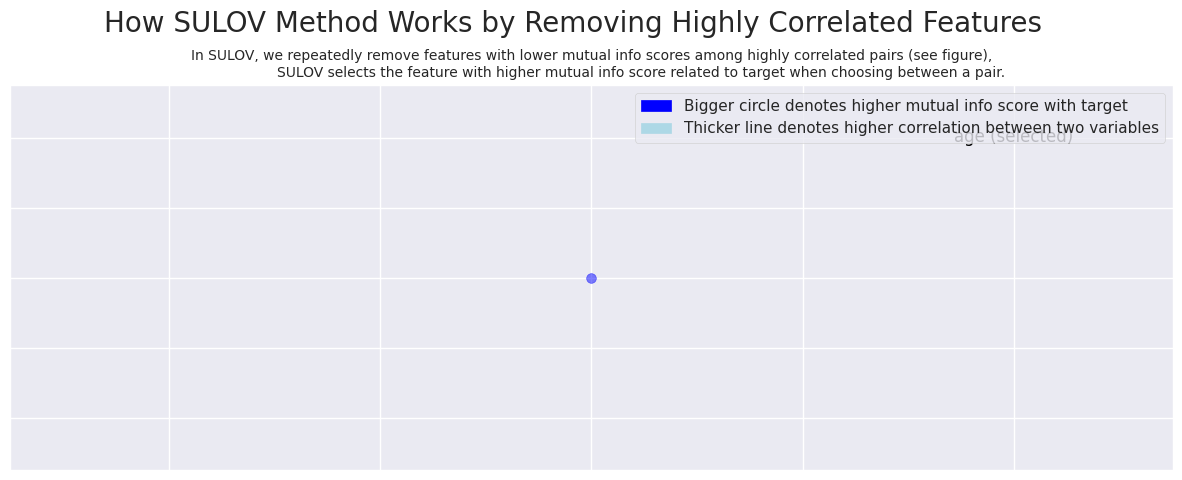

Splitting selected features into float and categorical (integer) variables:
    (1) float variables ...
    (7) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 8 
    Finding Important Features using Boosted Trees algorithm...
        using 8 variables...
        using 6 variables...
        using 4 variables...
        using 2 variables...
Found 7 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  1047 , CV rows =  262
    Binning_Flag set to False or there are no float vars in data set to be binned
    Adding one Feature named survived_KMeans_Clusters based on KMeans_Featurizer_Flag=True...
    Used KMeans to naturally cluster Train 

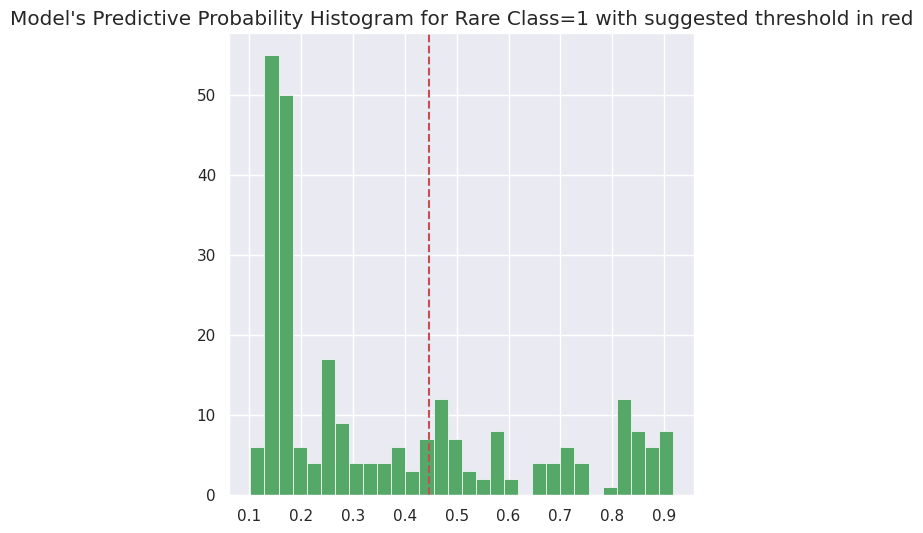

    Using threshold=0.5. However, 0.448 provides better F1=0.74 for rare class...
########################################################
Forests Model Prediction Results on Held Out CV Data Set:
    OOB Score = 0.809
    Regular Accuracy Score = 80.9%
Balanced Accuracy = 75.60% with Threshold = 0.50
Confusion Matrix:
[[151  11]
 [ 42  58]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       162
           1       0.84      0.58      0.69       100

    accuracy                           0.80       262
   macro avg       0.81      0.76      0.77       262
weighted avg       0.80      0.80      0.79       262

Balanced Accuracy = 78.83% with Threshold = 0.45
Confusion Matrix:
[[142  20]
 [ 30  70]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       162
           1       0.78      0.70      0.74       100

    accuracy                           0.81       262
   macro avg       0.

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 80.5%
    Balanced Accuracy = 78.3%
    Precision         = 77.5%
    Average Precision = 79.8%
    Recall            = 69.0%
    F1 Score          = 73.0%
#####################################################
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       162
           1       0.78      0.69      0.73       100

    accuracy                           0.81       262
   macro avg       0.80      0.78      0.79       262
weighted avg       0.80      0.81      0.80       262

[[142  20]
 [ 31  69]]
#############################################################################
Single Model is better than Ensembling Models for this data set.
Could not plot Cross Validation Parameters
    Time taken for this Target (in seconds) = 202
    Binning_Flag set to False or there are no

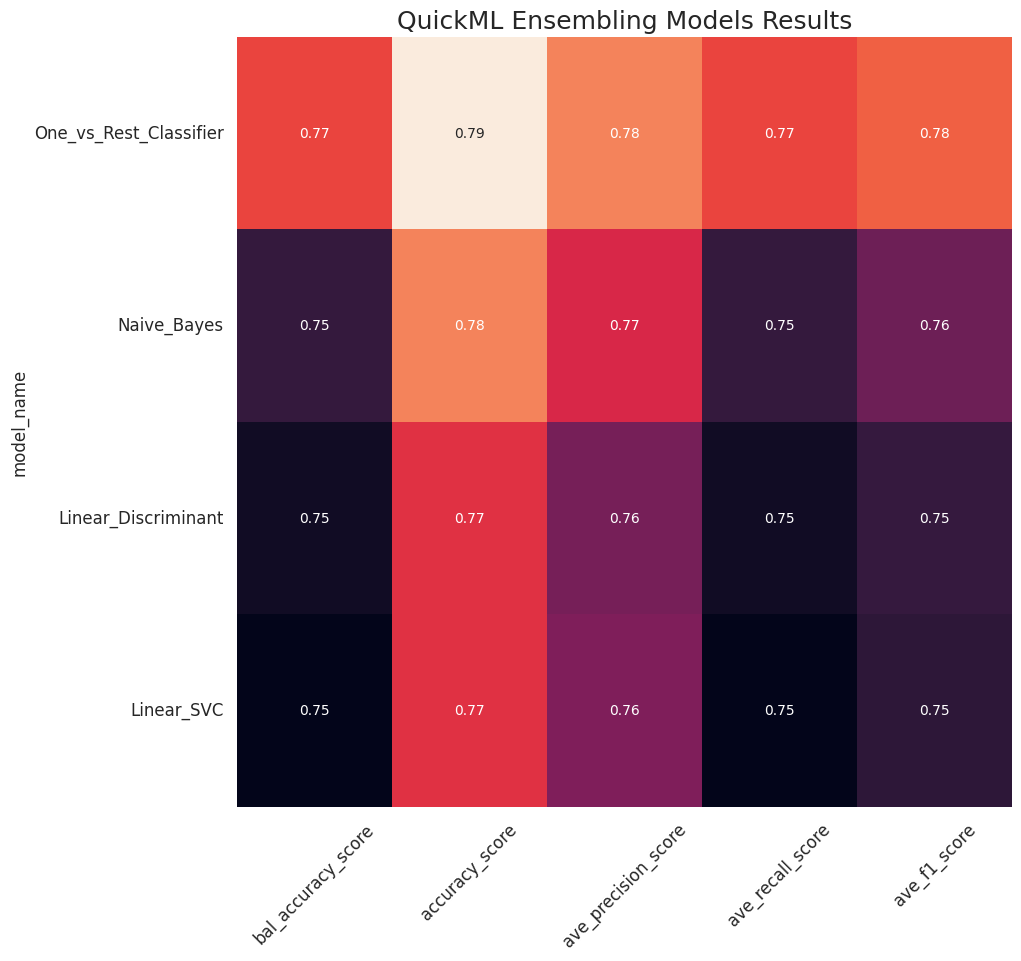

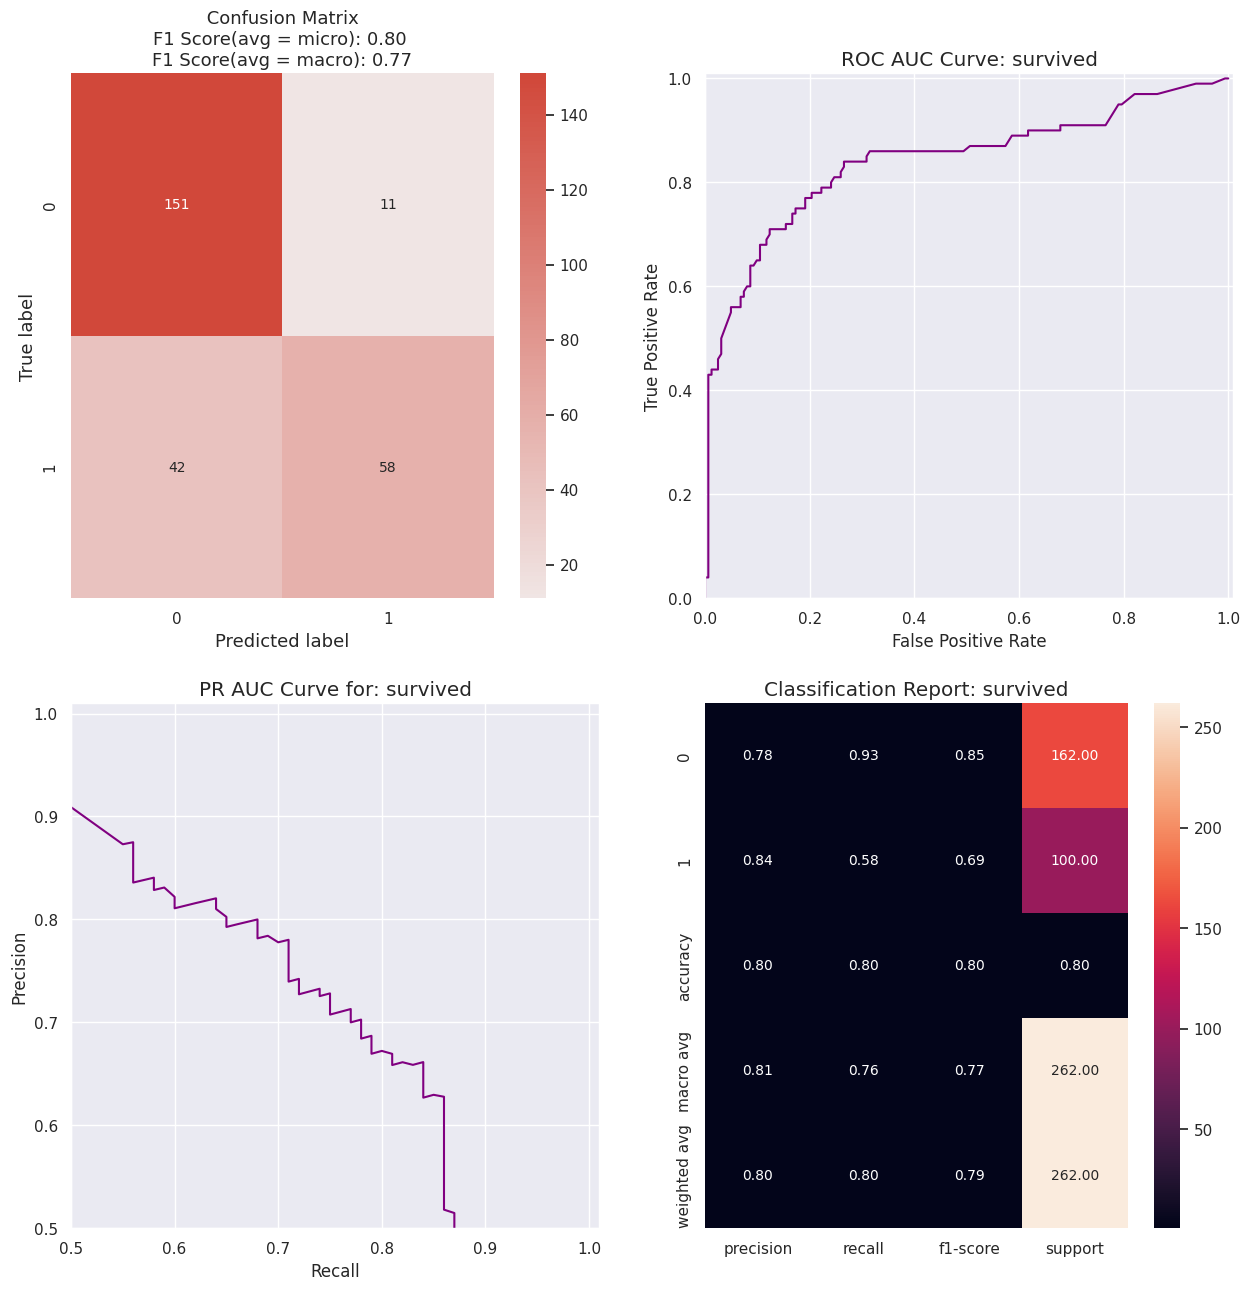

<Figure size 1500x500 with 0 Axes>

In [ ]:
from autoviml.Auto_ViML import Auto_ViML

# Assuming 'train' is your training DataFrame and 'target' is the target column name
model, features, trainm, testm = Auto_ViML(
    train=df3,
    target='survived',  # Your target column (e.g., 'survived' in Titanic dataset)
    test="",          # Optional test dataset
    sample_submission=None,
    hyper_param="GS",   # GridSearch for hyperparameter tuning
    feature_reduction=True,
    scoring_parameter="accuracy",
    KMeans_Featurizer=True,  # Enable KMeans clustering as a feature engineering step
    Boosting_Flag=False,
    verbose=1
)


In [ ]:
!pip install --upgrade scipy==1.11.4 # Upgrade or downgrade to a compatible version

In [ ]:
df3.head()

,TicketClass,survived,age,withspouse,withchildren,embarked,sex_male
0,1,1,29.00,0,0,S,0
1,1,1,0.92,1,1,S,1
2,1,0,2.00,1,1,S,0
3,1,0,30.00,1,1,S,1
4,1,0,25.00,1,1,S,0
